# Largest Palidrome Product
A palicromic number read the same both ways. The largest palidrome made from the product of 2-digit numbers is 9009. Find the largest palindrome made from the product of two  3-digit numbers.

## Solution One - Brute Force
The simplest solution to the problem is to test every possible pair of 3-digits numbers and see if the are a palindrome.

In [5]:
from utils.timing import timed


def is_palindrome(number: int) -> bool:
    """
    test if a number is a palindrome
    
    :param number: number
    :returns: whether the number is a palidrome
    """    
    number = str(number)
    return number == number[::-1]


@timed(1)
def solution_one(digits: int) -> int:
    """
    find the largest palidrome resulting from the multiplication of 2 n-digit numbers
    
    :param digits: how many digits a number must have
    :returns: largest palidrome resulting from the multiplication of 2 n-digit numbers and
    -1 if none were found
    """
    upper_bound: int = 10 ** digits - 1
    lower_bound: int = 10 ** (digits - 1) - 1
    answer: int = -1
        
    for i in range(upper_bound, lower_bound, - 1):
        
        for j in range(i, lower_bound, - 1):
            product: int = i * j
                
            if product <= answer:
                break
                
            if is_palindrome(product):
                answer = product
                break
                
    return answer
                
                
answer, time = solution_one(3)
print(f'the answer is {answer}')
print(f'that took {time} seconds')

the answer is 906609
that took 0.0023501997002313146 seconds


### Problems with solution one
The biggest problem with solution two is that it test all the numbers in the interval when, if they are larger than 9, all palindromes are multiples of 11

In [6]:
from utils.timing import timed


@timed(1)
def solution_two(digits: int) -> int:
    """
    find the largest palidrome resulting from the multiplication of 2 n-digit numbers
    
    :param digits: how many digits a number must have
    :returns: largest palidrome resulting from the multiplication of 2 n-digit numbers and
    -1 if none were found
    """
    upper_bound: int = 10 ** digits - 1
    lower_bound: int = 10 ** (digits - 1) - 1
    answer: int = -1
        
    for i in range(upper_bound, lower_bound, - 1):
        
        for j in range(i - i % 11, lower_bound, - 11):
            product: int = i * j
                
            if product <= answer:
                break
                
            if is_palindrome(product):
                answer = product
                break
                
    return answer
                
                
answer, time = solution_two(3)
print(f'the answer is {answer}')
print(f'that took {time} seconds')

the answer is 906609
that took 0.0004398799988848623 seconds


### Problems with solution two
While solution 2 is more efficient, it does not address solution one's fundamental issue of having to check every pair of possible $n$-digit numbers, we just reduced the number of pairs checked by a constant factor

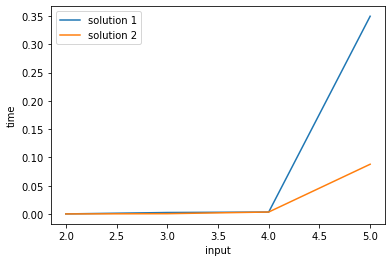

In [9]:
from utils.plotting import plot_range

params = [(i, ) for i in range(2, 7)]
plot_range(params, (solution_one, solution_two))